<a href="https://colab.research.google.com/github/coldsober-irene/ASSIGNMENTS/blob/main/Minefield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##parameters definition


1.   $s$ ($n = 2$): number of states (h1 and h2)
2.   $i$ ($m = 2$): number of inputs (Q flowrate)
3.   $o$ ($p = 2$): number of outputs (Y water level)


**discrete state model matrices**
1. $Ad$ ------- ($s*s$)
2. $Bd$ ------- ($s*i$)
3. $Cd$ ------- ($o*i$)

**vectors**
1. $X(k)$ = \begin{bmatrix} h1 \\ h2 \end{bmatrix}
2. $U(k)$ = \begin{bmatrix} Q1 \\ Q2 \end{bmatrix}
3. $Y(k)$ = \begin{bmatrix} h1 \\ h2 \end{bmatrix}

**Explanations about manipulated variable U(k)**

$U(k+1) = u(k) + \Delta U$

where:

 $U(k+1)$ is $k+1$ time step control input

 $\Delta U$ is the incremental control input obtained through solving optimization problem

 *optimizers* : (Quadratic Programming (QP) Solvers,  MPC Toolbox in MATLAB provides various solvers like qpOASES, which is a QP solver specifically designed for MPC)




In [4]:
import numpy as np
import cvxpy as cp
# A_e = np.array([[0.9638, 0.0162, 0, 0],
#                           [0.0162, 0.9627, 0, 0],
#                           [0.9638, 0.0162, 1.0000, 0],
#                           [0.0162, 0.9627, 0, 1.0000]])

# B_e = np.array([[0.0031, 0],
#                           [0, 0.0031],
#                           [0.0031, 0],
#                           [0, 0.0031]])

# C_e = np.array([[0, 0, 1, 0],
#                           [0, 0, 0, 1]])
# Define the system matrices
A = np.array([[1.0, 1.0], [0, 1.0]])
B = np.array([[0.5], [1.0]])


# Define the system dimensions
n = A.shape[0]  # Number of states
m = B.shape[1]  # Number of inputs

# Define the prediction horizon
N = 10

# Define the initial state
x0 = np.array([1.0, 0])

# Define the reference input and states
xr = np.zeros((n, N+1))  # Reference state
ur = np.zeros((m, N))    # Reference input
# Define decision variables
X = cp.Variable((n, N+1))  # State trajectory variables
U = cp.Variable((m, N))    # Control trajectory variables

# Define the cost function
cost = cp.sum_squares(X[:, :N] - xr[:, :N]) + cp.sum_squares(U - ur)

# Define the constraints
constr = [X[:, 0] == x0]
for i in range(N):
    constr += [X[:, i+1] == A@X[:, i] + B@U[:, i]]  # System dynamics
    constr += [cp.norm(U[:, i], 'inf') <= 1]  # Control constraints

# Define the problem and solve
prob = cp.Problem(cp.Minimize(cost), constr)
prob.solve()

# Get the optimal control sequence
U_opt = U.value[:, 0]
print(U_opt)
print(U.value)


[-0.43448286]
[[-4.34482857e-01  1.06755499e-01  1.62543336e-01  1.02448890e-01
   4.65853497e-02  1.57901933e-02  3.11683671e-03 -5.80147511e-04
  -8.30744193e-04 -7.78199030e-19]]


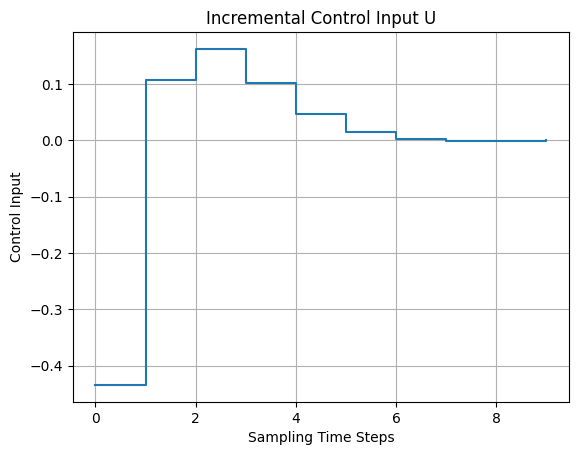

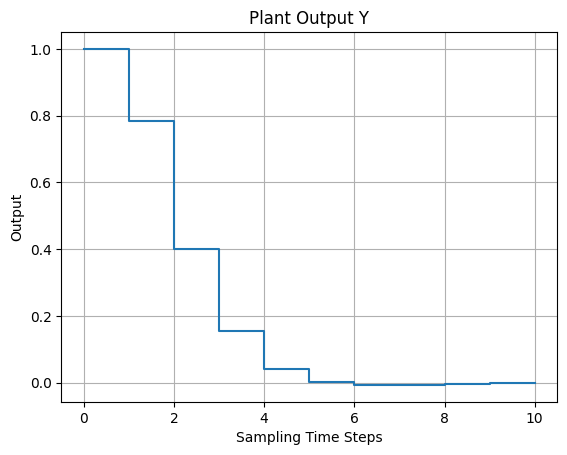

In [5]:
import matplotlib.pyplot as plt

# Get the optimal state and control sequences
X_opt = X.value
U_opt = U.value

# Compute the plant output
Y_opt = np.zeros((1, N+1))
for i in range(N):
    Y_opt[:, i] = np.array([1, 0]) @ X_opt[:, i]

# Create a time vector
t = np.linspace(0, N, N+1)

# Plot the incremental control input
plt.figure()
plt.step(t[:-1], U_opt[0, :], where='post')
plt.title('Incremental Control Input U')
plt.xlabel('Sampling Time Steps')
plt.ylabel('Control Input')
plt.grid(True)

# Plot the plant output
plt.figure()
plt.step(t, Y_opt[0, :], where='post')
plt.title('Plant Output Y')
plt.xlabel('Sampling Time Steps')
plt.ylabel('Output')
plt.grid(True)

plt.show()


In [6]:
# Define the control horizon
Nc = 3

# Define the constraints
constr = [X[:, 0] == x0]
for i in range(N):
    constr += [X[:, i+1] == A@X[:, i] + B@U[:, i]]  # System dynamics
    constr += [cp.norm(U[:, i], 'inf') <= 1]  # Control constraints
    constr += [cp.norm(X[:, i], 'inf') <= 10]  # State constraints
    if i < N - 1:
        constr += [cp.norm(U[:, i+1] - U[:, i], 'inf') <= 0.1]  # Change in control constraints

# Define the cost function
cost = cp.sum_squares(X[:, :N] - xr[:, :N]) + cp.sum_squares(U[:, :Nc] - ur[:, :Nc])

# Define the problem and solve
prob = cp.Problem(cp.Minimize(cost), constr)
prob.solve()

# Get the optimal control sequence
U_opt = U.value[:, 0]


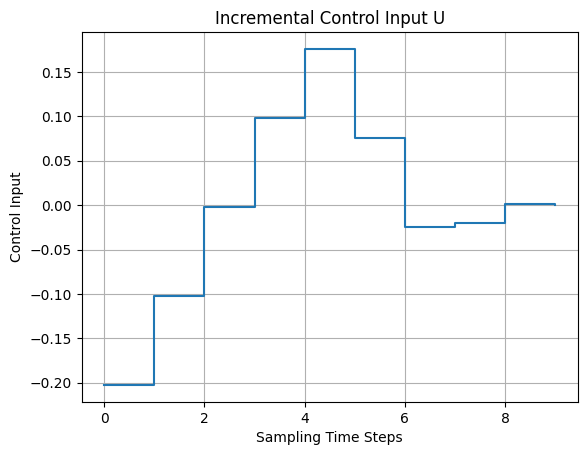

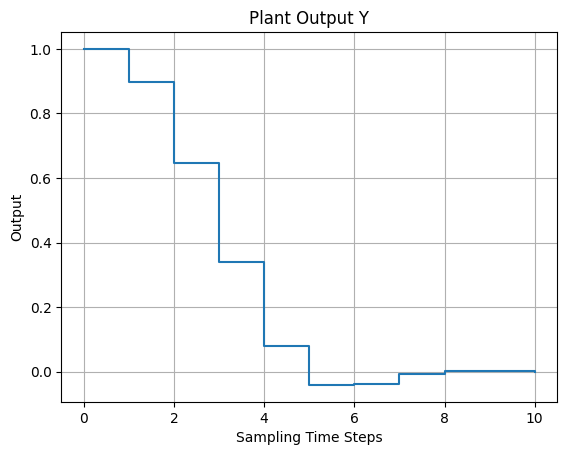

In [7]:
# Get the optimal state and control sequences
X_opt = X.value
U_opt = U.value

# Compute the plant output
Y_opt = np.zeros((1, N+1))
for i in range(N):
    Y_opt[:, i] = np.array([1, 0]) @ X_opt[:, i]

# Create a time vector
t = np.linspace(0, N, N+1)

# Plot the incremental control input
plt.figure()
plt.step(t[:-1], U_opt[0, :], where='post')
plt.title('Incremental Control Input U')
plt.xlabel('Sampling Time Steps')
plt.ylabel('Control Input')
plt.grid(True)

# Plot the plant output
plt.figure()
plt.step(t, Y_opt[0, :], where='post')
plt.title('Plant Output Y')
plt.xlabel('Sampling Time Steps')
plt.ylabel('Output')
plt.grid(True)

plt.show()


In [9]:
A_e = np.array([[0.9638, 0.0162, 0, 0],
                          [0.0162, 0.9627, 0, 0],
                          [0.9638, 0.0162, 1.0000, 0],
                          [0.0162, 0.9627, 0, 1.0000]])